<a href="https://colab.research.google.com/github/abuebayyeh/imperial_eee_machine_learning_course/blob/main/04_ML_Logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression


---

Despite of the efficiency of the perceptron algorithm in binary classification tasks; however, the algorithm never converges when the data are not linearly seperable. Logistic regression is a supervised ML algorithm that is used in binary classification problems. The algorithm converts the linear model predictions into a probability between 0 and 1. For better understanding of this algorithm, let us recall the odds ratio, which is the odds in favour of a particular event to occur. The odds ratio can be formulated as $\frac{p}{1-p}$, where $p$ is the probability of a positive event (the event that we want to predict e.g. $y = 1$). Let us now extend our previous discussion and define the logit function, which is simply the logarithm of the odds ratio (log-odds) given by the following equation:

\begin{equation}
logit(p) = \log \left(\frac{p}{1-p}\right)
\end{equation}

As $p$ is a probability, the logit function takes a value between 0 and 1 and transforms them to values over the entire real number range, which we can use to express a linear relationship between feature values and the log-odds.

\begin{equation}
logit\left(p\left(y=1|\mathbf{x}\right)\right)=w_0x_0 + w_1x_1 + \ldots + w_nx_n = \sum_{i=0}^{n} w_nx_n
\end{equation}

Hence, $p\left(y=1|\mathbf{x}\right)$ is the probability of a sample point that belongs to class 1 given its features $x$. However, in the learning process, we are more interested in the opposite case such that predicting the probability that a certain sample belongs to a particular class, which is simply the inverse of the logit function. The inverse of the logit function is called the $logistic$ function (also know as $Sigmoid$ function). The Sigmoid function is given by the equation below:

\begin{equation}
\sigma(z) = \frac{1}{1+e^{-z}}
\end{equation}

Hence, $z$ is the net input, that is, the linear combination of weights and sample features such that $z = \sum_{i=0}^{n} w_nx_n$. The Sigmoid function can be further visualised and plotted using the figure below:

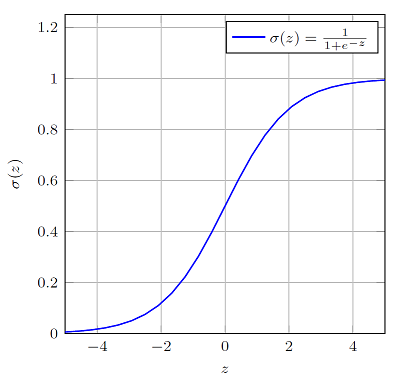

From the figure above we can observe that the Sigmoid function is bouned between 0 and 1. Such that if $z$ goes toward infinity ($z \to \infty$) then $\sigma(z)=\frac{1}{1+e^{-\infty}}=1$, and on the other hand when $z$ goes toward minus infinity ($z \to -\infty$) then $\sigma(z)=\frac{1}{1+e^{\infty}}=0$. Thus, we conclude that sigmoid function takes real number values as input and transforms them to values in the range [0,1] with $\sigma(0) = 0.5$.

In logistic regression, the activation function simply becomes the sigmoid function that we defined earlier, which is illustrated in the following figure:

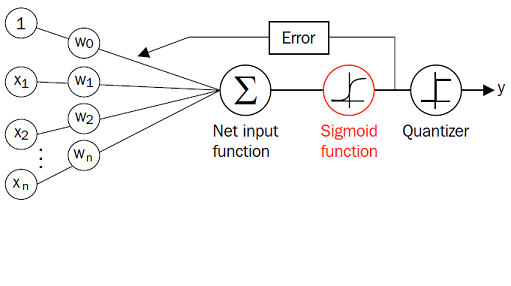

The output of the Sigmoid activation function is interpreted as the probability of particular sample belonging to class 1 $\sigma(z)=p\left(y=1|\mathbf{x,w}\right)$ given set of features $x$ and set of weights $w$. For instance, assume we have a binary classifier to classify samples of Iris-Versicolor ($y=1$) vs. Iris-Setosa ($y=0$). Then if we compute $\sigma(z)=0.9$, it means that the chance that this sample is an Iris-Versicolor flower is $90\%$. Similarly, the probability that this flower is an Iris-Setosa flower can be calculated as $p\left(y=0|\mathbf{x,w}\right) = 1 - p\left(y=1|\mathbf{x,w}\right) = 0.1$ or $10\%$. The predicted probability can be converted into a binary outcome via a quantizer (unit step function):

\begin{equation}
y_{pred} = \begin{cases}
      1 & \sigma(z)\geq 0.5 \\
      0 & otherwise
   \end{cases}
\end{equation}


So far we have discussed how Logistic regression makes predictions, but we did not talk about the cost function and learning process. Unlike the case in linear regression where we used MSE cost function, in logistic regression we use log-loss (also known as binary cross entropy (BCE)), given by the equation below:

\begin{equation}
    J(w)=\frac{1}{N}\sum -y_{n}\cdot\log\left(y_{pred}\right)-\left(1-y\right)\cdot\log\left(1-y_{pred}\right)
\end{equation}
where $y_{n}$ is the label  for training example $n$, $y_{pred}$ is the predicted class.


For more information why we chose BCE over MSE, please refer to the lecture notes

Our main aim is to minimise our BCE cost function in order to get accurate predictions. In order to do that, we keep updating the parameter $w$ in the direction that minimises the cost function. The amount of change that we modify $w$ is called the gradient and is given by differentiating the cost function with respect to $w$. We can control how fast this gradient step is moving by introducing the learning rate ($\alpha$). This process is called Gradient Descent and is illustrated in the figure below:

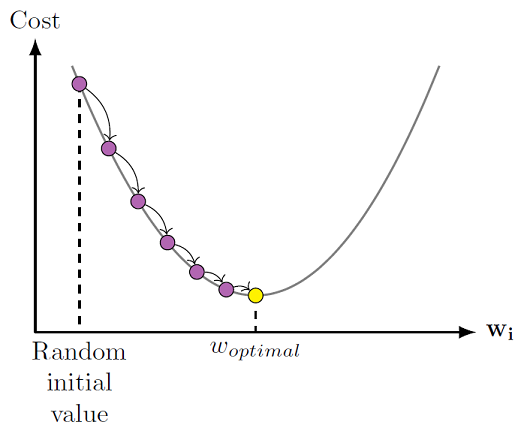


Reference:
"Python Machine Learning," Sebastian Raschka, Packt Publishing, 2015


# Data Used & Problem Definition

We will use logistic regression as a binary classifier between Setosa vs other classes (verginica and versicolor grouped together). Here we say that data points with features that result in output probabilities closer to 0 are likely Setosa, while values closer to 1 are likely not Setosa. For simplicity, we will consider two features, petal length and sepal length, which can be visualised in a 2D plot.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import pandas as pd

In [2]:
iris = datasets.load_iris()

In [3]:
iris_data = pd.DataFrame(data=iris['data'],columns=iris['feature_names'])
iris_data["target"] = iris['target']

In [ ]:
iris_data

In [ ]:
iris.target_names

In [ ]:
# Target labels are the index in iris.target_names
labels = iris_data.iloc[:,4]

# Setosa is assigned label 0, while all other classes will have a label of 1
y = np.where(labels == 0, 0, 1)

# Consider only two features - sepal length (column 0) and petal length (column 2)
# Bias term (intercept) is added to each data point (row)
X = iris_data.iloc[:,[0,2]]
intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

# Plot features in 2D plot - sepal length (x-axis) vs petal length (y-axis)
feat1, feat2 = 'sepal length (cm)', 'petal length (cm)'
X_target = iris_data[iris_data.target==0]
X_other = iris_data[iris_data.target!=0]

plt.scatter(X_target[feat1],X_target[feat2],color='red',marker='o',label="Setosa")
plt.scatter(X_other[feat1],X_other[feat2],color='blue',marker='o',label='Other')
plt.title("Sepal Length vs Petal Length")
plt.xlabel(feat1)
plt.ylabel(feat2)
plt.legend(loc='upper left')
plt.show()

In [7]:
def sigmoid(z):
    # Sigmoid function
    return 1 / (1 + np.exp(-z))

In [8]:
def cost(Y, y):
    # log-loss or Binary Cross Entropy (BCE)
    eps = 1e-15 # to avoid numerical error at log(0)
    return (-y * np.log(Y+eps) - (1 - y) * np.log(1 - Y + eps)).mean()

In [9]:
def plot_cost(loss):
    # Function for plotting the cost vs iterations.
    plt.plot(range(1, len(loss) + 1), loss)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    # plt.savefig('plot.pdf')
    plt.show()

In [10]:
def predict(X, W):
    # Function for predicting on test data (see Task 1)
    prediction = sigmoid(np.dot(X, W))
    return prediction.round()

In [11]:
def fit(alpha, num_iter, X, y):
    # weights initialization
    W = np.zeros(X.shape[1])
    loss_list = []
    for i in range(num_iter):
        # Feed forward
        z = np.dot(X, W)
        Y = sigmoid(z)
        # Gradient
        W += alpha * (np.dot(X.T, (y-Y)) / y.size)
        loss = cost(Y, y)
        loss_list.append(loss)

        if i % 100 == 0:
            print(f'iteration: {i+1} \t', f'cost: {loss} \t', f'weights: {W} \t')
    plot_cost(loss_list)
    # This function will return the final weights as an array
    return W

In [ ]:
alpha = 0.01
num_iter = 3000
model_weights = fit(alpha, num_iter, X,y)

In [13]:
predictions = predict(X, model_weights)
pred = predictions.astype('int')
true = y.astype('int')

# Evaluation Metrics

Evaluation metrics are used to measure the performance of machine learning models. It is very important to evaluate the model after training takes place to decide whether the model can be implemented in the project or not. There are a variety of techniques used for evaluation such as classification accuracy, loss and confusion matrix. Confusion matrix is very useful tool for evaluation. It visualises the predictions for a classification problem against the real labels in table format.  Each row of the matrix represents the instances of real labels while each column represents the instances of predicted labels. The values of the confusion matrix are denoted by four categories, namely, true positive (TP), true negative (TN), false negative (FN) and false positive (FP). The outcomes of a confusion matrix can be visualised in Figure


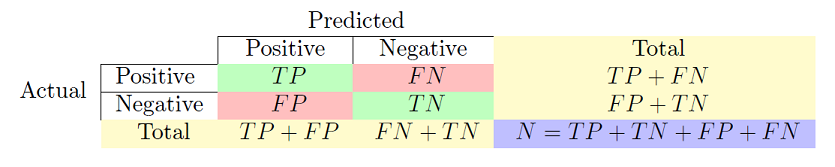

In [ ]:
def compute_confusion_matrix(true, pred):

    num_cls = len(np.unique(true)) # Number of classes
    result = np.zeros((num_cls, num_cls))

    for i in range(len(true)):
        result[true[i]][pred[i]] += 1

    return result

conf_matrix = compute_confusion_matrix(true, pred)
print('Confusion matrix result: ')
print(conf_matrix)

diagonal_sum = conf_matrix.trace()
sum_of_all_elements = conf_matrix.sum()
accuracy = diagonal_sum / sum_of_all_elements
print('accuracy = {:0.2f}%'.format(accuracy*100))

## Task 1 [40 marks]

In the provided code, the network's performance was assessed using the same training dataset for both training and evaluation, which is not a recommended practice in evaluating machine learning algorithms. Your task is to adjust the code to split the data into two separate sets: a training set and a testing set. The training set should account for 80% of the original data, while the remaining 20% will constitute the test data. Additionally, as part of your report, you should address the following points:

1. **Importance of Having Two Datasets**: In your report, discuss the significance of using two distinct datasets (training and testing) when evaluating a machine learning algorithm.

2. **Code for Data Splitting**: Provide the code you used to divide the original dataset into the training and testing datasets. Ensure that the split is random and maintains data integrity.

3. **Confusion Matrix and Accuracy**: After modifying the code and training the model on the training dataset, calculate the confusion matrix and total accuracy of the algorithm using the testing dataset. Include these performance metrics in your report to assess the model's effectiveness in classifying data.

Please ensure that your code is well-documented and your report provides clear explanations of the concepts discussed.


In [15]:
import random
random.seed(22)
# Split the data into training and test sets
def train_test_split(X, y, test_size=0.2):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    X = X[indices]
    y = y[indices]
    split = int(len(y) * (1 - test_size))
    return X[:split], X[split:], y[:split], y[split:]

In [ ]:
# Train the model on the training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model_weights = fit(alpha, num_iter, X_train, y_train)


In [17]:
# Predict on the test set
y_pred = predict(X_test, model_weights)
y_pred = y_pred.astype('int')
y_test = y_test.astype('int')

In [ ]:
# Compute the confusion matrix and accuracy
conf_matrix_new = compute_confusion_matrix(y_test, y_pred)
print('Confusion matrix result: ')
print(conf_matrix_new)

diagonal_sum = conf_matrix_new.trace()
sum_of_all_elements = conf_matrix_new.sum()
accuracy = diagonal_sum / sum_of_all_elements
print('accuracy = {:0.2f}%'.format(accuracy*100))

## Task 2 [20 marks]

In the provided code, the primary objective was to classify Iris-Setosa versus other classes. Your task is to modify the code so that it can classify Iris-Versicolor versus other classes and Iris-Virginica versus other classes separately. For each case, you should divide the dataset into training and testing subsets. Additionally, your report should cover the following aspects:

1. **Dataset Adjustment Code**: Provide the code you used to adjust the dataset for each classification scenario, ensuring that you have separate training and testing data for Iris-Versicolor versus other classes and Iris-Virginica versus other classes.

2. **Reporting Weights**: Present the final weights obtained for each classification case.

3. **Performance Comparison**: Compare the performance of the network for each classification case. Discuss any differences in performance and provide justifications for why the performance may vary between the two cases. Consider factors such as dataset characteristics and class separability.

Ensure that your code modifications are clearly documented, and your report provides insightful explanations for the observed differences in classification performance.


In [ ]:
# Dataset adjustment for versicolor classification
# Versicolor is assigned label 0, while all other classes will have a label of 1
y_versicolor = np.where(labels == 1, 0, 1)

# Train the model on the training set
X_train_versicolor, X_test_versicolor, y_train_versicolor, y_test_versicolor = train_test_split(X, y_versicolor, test_size=0.2)
model_weights_versicolor = fit(alpha, num_iter, X_train_versicolor, y_train_versicolor)

In [ ]:
# Predict on the test set
y_pred_versicolor = predict(X_test_versicolor, model_weights_versicolor)
y_pred_versicolor = y_pred_versicolor.astype('int')
y_test_versicolor = y_test_versicolor.astype('int')

# Compute the confusion matrix and accuracy
conf_matrix_versicolor = compute_confusion_matrix(y_test_versicolor, y_pred_versicolor)
print('Confusion matrix result: ')
print(conf_matrix_versicolor)

diagonal_sum_versicolor = conf_matrix_versicolor.trace()
sum_of_all_elements_versicolor = conf_matrix_versicolor.sum()
accuracy_versicolor = diagonal_sum_versicolor / sum_of_all_elements_versicolor
print('accuracy = {:0.2f}%'.format(accuracy_versicolor*100))

In [ ]:
# Dataset adjustment for virginica classification
# Virginica is assigned label 0, while all other classes will have a label of 1
y_virginica = np.where(labels == 2, 0, 1)

# Train the model on the training set
X_train_virginica, X_test_virginica, y_train_virginica, y_test_virginica = train_test_split(X, y_virginica, test_size=0.2)
model_weights_virginica = fit(alpha, num_iter, X_train_virginica, y_train_virginica)

In [ ]:
# Predict on the test set
y_pred_virginica = predict(X_test_virginica, model_weights_virginica)
y_pred_virginica = y_pred_virginica.astype('int')
y_test_virginica = y_test_virginica.astype('int')

# Compute the confusion matrix and accuracy
conf_matrix_virginica = compute_confusion_matrix(y_test_virginica, y_pred_virginica)
print('Confusion matrix result: ')
print(conf_matrix_virginica)

diagonal_sum_virginica = conf_matrix_virginica.trace()
sum_of_all_elements_virginica = conf_matrix_virginica.sum()
accuracy_virginica = diagonal_sum_virginica / sum_of_all_elements_virginica
print('accuracy = {:0.2f}%'.format(accuracy_virginica*100))

## Task 3 [40 marks]

In this tutorial, you were introduced to the parameter $\alpha$, also known as the learning rate. A fixed value of $0.01$ was chosen for our algorithm. Your task is to investigate the effect of selecting different values of $\alpha$ for the Iris-Setosa vs. All classifier. In your report, please cover the following aspects:

1. **Variation of $\alpha$**: Experiment with different values of $\alpha$ (e.g., 0.0001, 0.1, 1, 100). Note that you may want to print the loss more frequently to observe the initial behavior of the algorithm when using different $\alpha$ values.

2. **Code Execution**: Run the code for each of the specified $\alpha$ values and record the performance of the network for each case.

3. **Visualisation**: Include a graphical representation of the cost versus epochs for each $\alpha$ value. Additionally, report the accuracy of the test data and provide confusion matrices for each $\alpha$ value.

4. **Discussion**: In your own words, explain why the performance of the algorithm changes when using different $\alpha$ values. Discuss the effect of the learning rate on the gradient descent process, considering aspects like convergence speed, stability, and the risk of overshooting.

Ensure that your code adjustments are well-documented, and your report provides clear insights into the impact of varying the learning rate on the performance of the Iris-Setosa vs. All classifier.


In [23]:
alpha_list = [0.0001, 0.1, 1, 100]
num_iter = 3000

# define a new fit function to print the loss more frequently
def fit_new(alpha, num_iter, X, y, freq=100):
    # weights initialization
    W = np.zeros(X.shape[1])
    loss_list = []
    for i in range(num_iter):
        # Feed forward
        z = np.dot(X, W)
        Y = sigmoid(z)
        # Gradient
        W += alpha * (np.dot(X.T, (y-Y)) / y.size)
        loss = cost(Y, y)
        loss_list.append(loss)

        if i % freq == 0:
            print(f'iteration: {i+1} \t', f'cost: {loss} \t', f'weights: {W} \t')
    plot_cost(loss_list)
    # This function will return the final weights as an array
    return W

alpha: 0.0001
iteration: 1 	 cost: 0.6931471805599435 	 weights: [1.50000000e-05 8.32916667e-05 3.64166667e-05] 	
iteration: 201 	 cost: 0.6797180525233683 	 weights: [0.00272123 0.01499133 0.00613033] 	
iteration: 401 	 cost: 0.6714163344032716 	 weights: [0.00493355 0.02695869 0.01023012] 	
iteration: 601 	 cost: 0.6661811682407911 	 weights: [0.00676453 0.03665875 0.01279867] 	
iteration: 801 	 cost: 0.6627862573847808 	 weights: [0.00830067 0.0446088  0.01419142] 	
iteration: 1001 	 cost: 0.6605019487852745 	 weights: [0.00960812 0.05120431 0.01467978] 	
iteration: 1201 	 cost: 0.6588923260251511 	 weights: [0.01073752 0.05674776 0.01447109] 	
iteration: 1401 	 cost: 0.6576955020378848 	 weights: [0.01172774 0.0614712  0.01372425] 	
iteration: 1601 	 cost: 0.6567532281208385 	 weights: [0.01260871 0.06555334 0.01256147] 	
iteration: 1801 	 cost: 0.6559693621190149 	 weights: [0.0134036  0.06913236 0.01107716] 	
iteration: 2001 	 cost: 0.6552852127952146 	 weights: [0.0141304  0.072

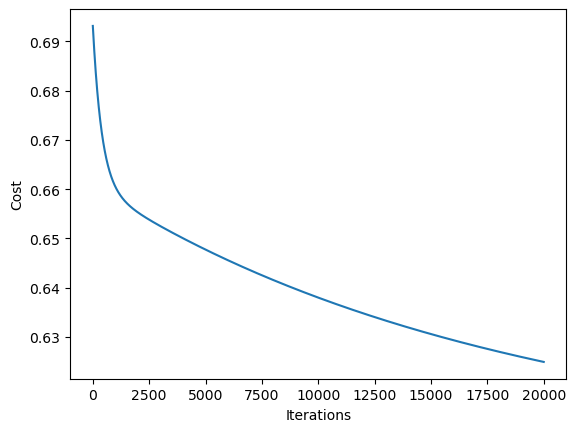

Confusion matrix result: 
[[ 0.  8.]
 [ 0. 22.]]
accuracy = 73.33%

alpha: 0.1
iteration: 1 	 cost: 0.6931471805599435 	 weights: [0.015      0.08329167 0.03641667] 	
iteration: 51 	 cost: 0.6094849891575358 	 weights: [ 0.07142202  0.32492229 -0.35595601] 	
iteration: 101 	 cost: 0.6049423706983287 	 weights: [ 0.07121315  0.40743063 -0.47119331] 	
iteration: 151 	 cost: 0.6042717700429051 	 weights: [ 0.05433581  0.4401549  -0.5126505 ] 	
iteration: 201 	 cost: 0.6040599170008742 	 weights: [ 0.03191176  0.45584436 -0.52921005] 	
iteration: 251 	 cost: 0.6039115585552625 	 weights: [ 0.00759173  0.46528093 -0.5367027 ] 	
iteration: 301 	 cost: 0.6037740123444032 	 weights: [-0.01731203  0.47234659 -0.54079364] 	
iteration: 351 	 cost: 0.6036398564779197 	 weights: [-0.04231173  0.47848789 -0.54358887] 	
iteration: 401 	 cost: 0.6035079995845061 	 weights: [-0.06722422  0.48425109 -0.54588275] 	
iteration: 451 	 cost: 0.6033782554414467 	 weights: [-0.091981    0.48984367 -0.54797668]

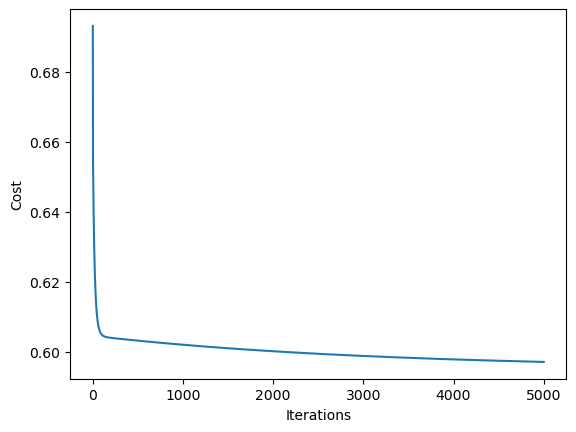

Confusion matrix result: 
[[ 0.  8.]
 [ 2. 20.]]
accuracy = 66.67%

alpha: 1
iteration: 1 	 cost: 0.6931471805599435 	 weights: [0.15       0.83291667 0.36416667] 	
iteration: 11 	 cost: 0.6835771692214173 	 weights: [ 0.06568037  0.0823404  -1.49825042] 	
iteration: 21 	 cost: 0.7716847626764396 	 weights: [ 0.18039739  0.68996327 -2.06585028] 	
iteration: 31 	 cost: 0.9156841866493771 	 weights: [ 0.14188323  0.56390705 -2.69867748] 	
iteration: 41 	 cost: 0.7911643645650328 	 weights: [ 0.19750942  1.31394493 -2.0537056 ] 	
iteration: 51 	 cost: 6.860454832496486 	 weights: [ 0.2348016   1.68390355 -2.26062921] 	
iteration: 61 	 cost: 1.3117609363789007 	 weights: [ 0.42194898  3.2174086  -1.10894285] 	
iteration: 71 	 cost: 1.8734071872959 	 weights: [ 0.29814871  3.24300165 -0.26951184] 	
iteration: 81 	 cost: 3.5655022780093875 	 weights: [-0.19183709  0.47915301 -2.69060829] 	
iteration: 91 	 cost: 5.353707927053779 	 weights: [-0.12457758  1.14436901 -2.43492149] 	
iteration: 1

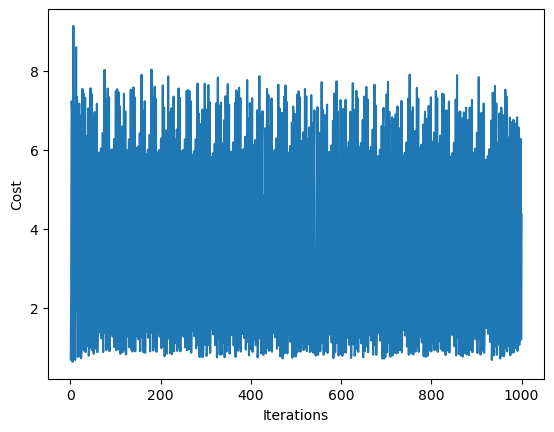

Confusion matrix result: 
[[ 8.  0.]
 [12. 10.]]
accuracy = 60.00%

alpha: 100
iteration: 1 	 cost: 0.6931471805599435 	 weights: [15.         83.29166667 36.41666667] 	
iteration: 2 	 cost: 12.08857173821874 	 weights: [ -20.         -124.125      -113.83333333] 	
iteration: 3 	 cost: 22.45020465669194 	 weights: [ 45.    249.875 109.25 ] 	
iteration: 4 	 cost: 12.08857173821874 	 weights: [ 10.          42.45833333 -41.        ] 	
iteration: 5 	 cost: 12.088571738218741 	 weights: [ -25.         -164.95833333 -191.25      ] 	
iteration: 6 	 cost: 22.45020465669194 	 weights: [ 40.         209.04166667  31.83333333] 	
iteration: 7 	 cost: 12.08857173821874 	 weights: [   5.            1.625      -118.41666667] 	
iteration: 8 	 cost: 22.45020465669194 	 weights: [ 70.         375.625      104.66666667] 	
iteration: 9 	 cost: 12.08857173821874 	 weights: [ 35.         168.20833333 -45.58333333] 	
iteration: 10 	 cost: 12.08857173821874 	 weights: [ 2.84217094e-14 -3.92083333e+01 -1.9583

C:\Users\lugua\AppData\Local\Temp\ipykernel_13760\490554598.py:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


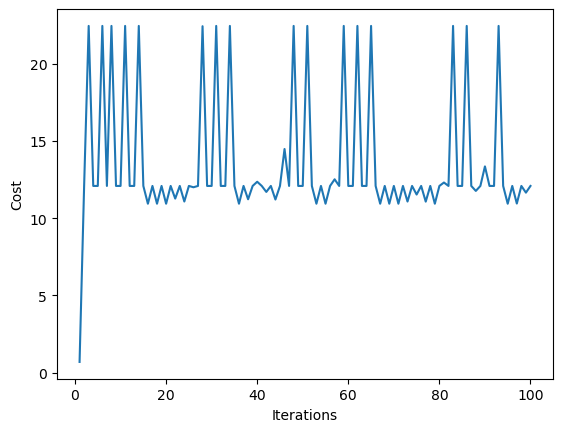

Confusion matrix result: 
[[ 8.  0.]
 [19.  3.]]
accuracy = 36.67%



In [32]:
# We use the worst-predicted class (Versicolor) to test the different learning rates
# Train the model on the training set
X_train_versicolor, X_test_versicolor, y_train_versicolor, y_test_versicolor = train_test_split(X, y_versicolor, test_size=0.2)

for alpha in alpha_list:
    print(f'alpha: {alpha}')
    # Use smaller epochs for alpha = 100 and alpha = 1
    alpha_epochs_freq = {0.0001: (20000, 200), 0.1: (5000, 50), 1: (1000, 10), 100: (100, 1)}
    num_iter, freq = alpha_epochs_freq[alpha]

    model_weights_versicolor = fit_new(alpha, num_iter, X_train_versicolor, y_train_versicolor, freq)

    # Predict on the test set
    y_pred_versicolor = predict(X_test_versicolor, model_weights_versicolor)
    y_pred_versicolor = y_pred_versicolor.astype('int')
    y_test_versicolor = y_test_versicolor.astype('int')

    # Compute the confusion matrix and accuracy
    conf_matrix_versicolor = compute_confusion_matrix(y_test_versicolor, y_pred_versicolor)
    print('Confusion matrix result: ')
    print(conf_matrix_versicolor)

    diagonal_sum_versicolor = conf_matrix_versicolor.trace()
    sum_of_all_elements_versicolor = conf_matrix_versicolor.sum()
    accuracy_versicolor = diagonal_sum_versicolor / sum_of_all_elements_versicolor
    print('accuracy = {:0.2f}%'.format(accuracy_versicolor*100))
    print('')

alpha: 0.0001
iteration: 1 	 cost: 0.6931471805599435 	 weights: [1.75000000e-05 1.31083333e-04 1.43375000e-04] 	
iteration: 201 	 cost: 0.6330832008938916 	 weights: [0.00290446 0.02262244 0.02619156] 	
iteration: 401 	 cost: 0.595774721480822 	 weights: [0.00477807 0.03895601 0.04789446] 	
iteration: 601 	 cost: 0.5716695015112325 	 weights: [0.00589389 0.05068666 0.06634729] 	
iteration: 801 	 cost: 0.5553252300625734 	 weights: [0.00644137 0.05896662 0.08236134] 	
iteration: 1001 	 cost: 0.5436427223853431 	 weights: [0.00655844 0.06463334 0.09652448] 	
iteration: 1201 	 cost: 0.5348272947256828 	 weights: [0.00634585 0.06829705 0.10926333] 	
iteration: 1401 	 cost: 0.5278161628086816 	 weights: [0.005878   0.07040749 0.12089096] 	
iteration: 1601 	 cost: 0.521965426908849 	 weights: [0.00521066 0.07130094 0.13164044] 	
iteration: 1801 	 cost: 0.5168766202124199 	 weights: [0.00438622 0.07123254 0.14168783] 	
iteration: 2001 	 cost: 0.5122984697872824 	 weights: [0.00343735 0.07039

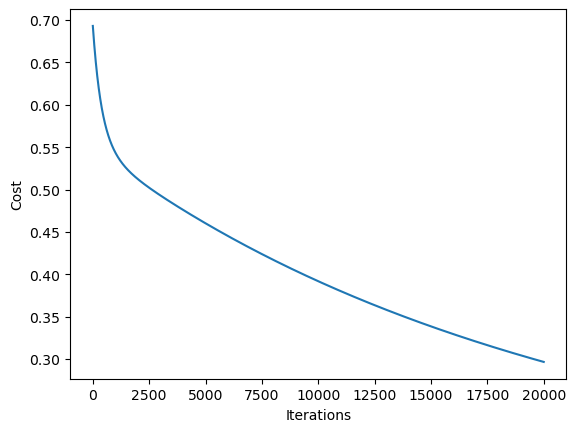

Confusion matrix result: 
[[11.  0.]
 [ 0. 19.]]
accuracy = 100.00%

alpha: 0.1
iteration: 1 	 cost: 0.6931471805599435 	 weights: [0.0175     0.13108333 0.143375  ] 	
iteration: 51 	 cost: 0.16521161333861958 	 weights: [-0.21784031 -0.52641183  1.23472962] 	
iteration: 101 	 cost: 0.09589203223329887 	 weights: [-0.31829634 -0.78738112  1.73819836] 	
iteration: 151 	 cost: 0.06848192314899616 	 weights: [-0.38176015 -0.94926271  2.06050158] 	
iteration: 201 	 cost: 0.053755850688735424 	 weights: [-0.42825555 -1.06685596  2.29850822] 	
iteration: 251 	 cost: 0.04451826912778998 	 weights: [-0.46501046 -1.1593936   2.48779547] 	
iteration: 301 	 cost: 0.03815698200516879 	 weights: [-0.49543851 -1.23580896  2.64529579] 	
iteration: 351 	 cost: 0.03349482030085531 	 weights: [-0.52142217 -1.30097297  2.7803899 ] 	
iteration: 401 	 cost: 0.029922318405171736 	 weights: [-0.54411014 -1.35783333  2.89882048] 	
iteration: 451 	 cost: 0.02709176510325885 	 weights: [-0.5642553  -1.40830981 

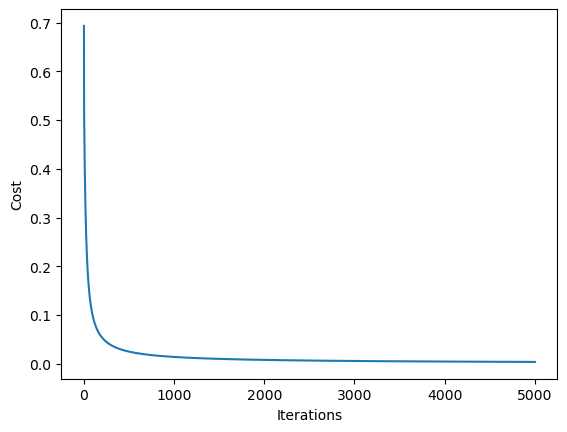

Confusion matrix result: 
[[11.  0.]
 [ 0. 19.]]
accuracy = 100.00%

alpha: 1
iteration: 1 	 cost: 0.6931471805599435 	 weights: [0.175      1.31083333 1.43375   ] 	
iteration: 11 	 cost: 0.059970321181977176 	 weights: [-0.49214169 -1.16753355  2.7480457 ] 	
iteration: 21 	 cost: 0.02911716322991716 	 weights: [-0.55697832 -1.3801576   2.94688047] 	
iteration: 31 	 cost: 0.024218037750895493 	 weights: [-0.59381607 -1.47246865  3.14047602] 	
iteration: 41 	 cost: 0.020833940541362138 	 weights: [-0.62438235 -1.54911914  3.30209982] 	
iteration: 51 	 cost: 0.018345384711451203 	 weights: [-0.65053539 -1.61477975  3.44113483] 	
iteration: 61 	 cost: 0.01643227372322835 	 weights: [-0.67340978 -1.67228928  3.5633264 ] 	
iteration: 71 	 cost: 0.014911928605985027 	 weights: [-0.6937501  -1.72350485  3.67245511] 	
iteration: 81 	 cost: 0.01367221174457456 	 weights: [-0.71207184 -1.76970919  3.77114482] 	
iteration: 91 	 cost: 0.01264033127154026 	 weights: [-0.72874693 -1.81182613  3.8612

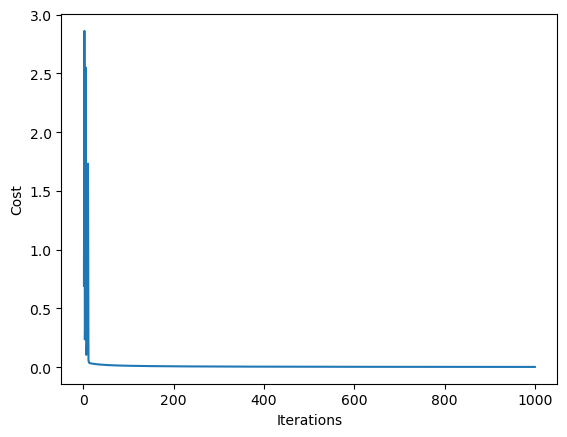

Confusion matrix result: 
[[11.  0.]
 [ 0. 19.]]
accuracy = 100.00%

alpha: 100
iteration: 1 	 cost: 0.6931471805599435 	 weights: [ 17.5        131.08333333 143.375     ] 	
iteration: 2 	 cost: 11.22510232834597 	 weights: [-15.         -31.08333333  96.04166667] 	
iteration: 3 	 cost: 0.22695093197293745 	 weights: [-16.66710002 -39.3353315   92.87433894] 	
iteration: 4 	 cost: 9.779214475242514e-16 	 weights: [-16.66710002 -39.3353315   92.87433894] 	
iteration: 5 	 cost: 9.779214475242514e-16 	 weights: [-16.66710002 -39.3353315   92.87433894] 	
iteration: 6 	 cost: 9.779214475242514e-16 	 weights: [-16.66710002 -39.3353315   92.87433894] 	
iteration: 7 	 cost: 9.779214475242514e-16 	 weights: [-16.66710002 -39.3353315   92.87433894] 	
iteration: 8 	 cost: 9.779214475242514e-16 	 weights: [-16.66710002 -39.3353315   92.87433894] 	
iteration: 9 	 cost: 9.779214475242514e-16 	 weights: [-16.66710002 -39.3353315   92.87433894] 	
iteration: 10 	 cost: 9.779214475242514e-16 	 weights: [

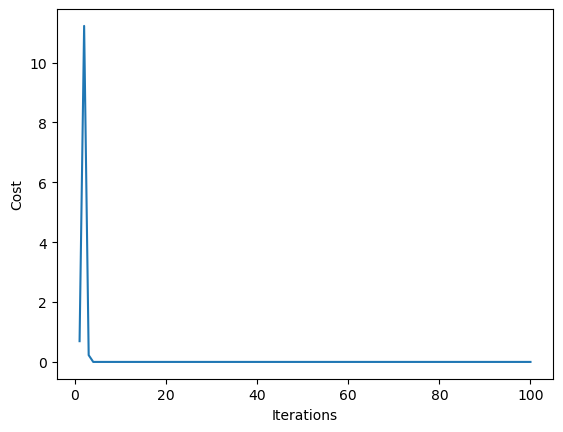

Confusion matrix result: 
[[11.  0.]
 [ 0. 19.]]
accuracy = 100.00%



In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

for alpha in alpha_list:
    print(f'alpha: {alpha}')
    # Use smaller epochs for alpha = 100 and alpha = 1
    alpha_epochs_freq = {0.0001: (20000, 200), 0.1: (5000, 50), 1: (1000, 10), 100: (100, 1)}
    num_iter, freq = alpha_epochs_freq[alpha]

    model_weights = fit_new(alpha, num_iter, X_train, y_train, freq)

    # Predict on the test set
    y_pred = predict(X_test, model_weights)
    y_pred = y_pred.astype('int')
    y_test = y_test.astype('int')

    # Compute the confusion matrix and accuracy
    conf_matrix = compute_confusion_matrix(y_test, y_pred)
    print('Confusion matrix result: ')
    print(conf_matrix)

    diagonal_sum = conf_matrix.trace()
    sum_of_all_elements = conf_matrix.sum()
    accuracy = diagonal_sum / sum_of_all_elements
    print('accuracy = {:0.2f}%'.format(accuracy*100))
    print('')